# HH wake deficit comparisons

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.lines import Line2D

In [2]:
# Put the list of all cases in here
cases = [
    # AMR-Wind data defs
    {'label':'AMR-Wind',
     'datadir':'../AMR.5kmX5km_turbine1/post_processing/data',
     'noturbdir':'../AMR.5kmX5km_noturbine1/post_processing/data_noturb',
     'prefix':'AMRWIND',
     'fname':'{prefix}_HH_VEL_PROFILE_x_{xD:06.2f}D.dat',
     'linestyle':{'linestyle':'-', 'lw':2},
    },
    
    # FLORIS data defs
    {'label':'FLORIS',
     'datadir':'../FLORIS_turbine1/data',
     'prefix':'FLORIS',
     'Uinf':6.265,
     'fname':'{prefix}_HH_VEL_PROFILE_x_{xD:06.2f}D.dat',
     'linestyle':{'linestyle':':'},
    },

    # WRF data defs
    {'label':'WRFLES',
     #'datadir':'../WRFLES.5kmX5km_turbine1/post_processing/data',
     'datadir':'../WRFLES.5kmX5km_turbine1/post_processing/data/wakeProfiles/wt/',
     'noturbdir':'../WRFLES.5kmX5km_turbine1/post_processing/data/wakeProfiles/nowt/',
     'prefix':'WRFLES',
     'fname':'{prefix}_HH_VEL_PROFILE_x_{xD:.1f}D.dat',
     'linestyle':{'linestyle':'-.', 'lw':1},
    },

    # Nalu data defs
    {'label':'NALUWIND',
     'datadir':'../NALU.5kmX5km_turbine1/postprocessing/data',
     'noturbdir':'../NALU.5kmX5km_turbine1/postprocessing/data_noturb',
     'prefix':'NALUWIND',
     'fname':'{prefix}_HH_VEL_PROFILE_x_{xD:06.2f}D.dat',
     'linestyle':{'linestyle':'--', 'lw':2},
    },

]

In [3]:
def makelegend(caselist, xtarget, figsize=(8,0.75), fontsize=10, addcolorxD=False):
    # Add Legend
    legfig, legax = plt.subplots(1, 1, figsize=figsize, dpi=125, sharey=True)
    legax.axis('off')
    legfontsize=fontsize
    caselines = [Line2D([0],[0], color='gray', **case['linestyle']) for  case in caselist]
    caselabels = [case['label'] for case in caselist]
    legend1 = plt.legend(caselines, 
                         caselabels, 
                         fontsize=legfontsize, frameon=False, loc='upper center', ncol=len(caselabels))
    legax.add_artist(legend1)

    if addcolorxD:
        cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
        caselines = [Line2D([0],[0], color=cycle[i]) for i in range(len(xtarget)) ]
        caselabels = ['x/D=%0.1f'%x for x in xtarget]
        legend2 = plt.legend(caselines, 
                         caselabels, 
                         fontsize=legfontsize, frameon=False, loc='lower center', ncol=len(caselabels))
        legax.add_artist(legend2)
    return

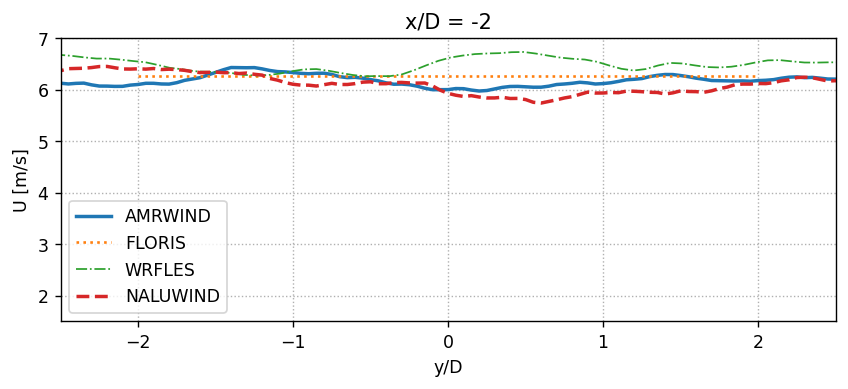

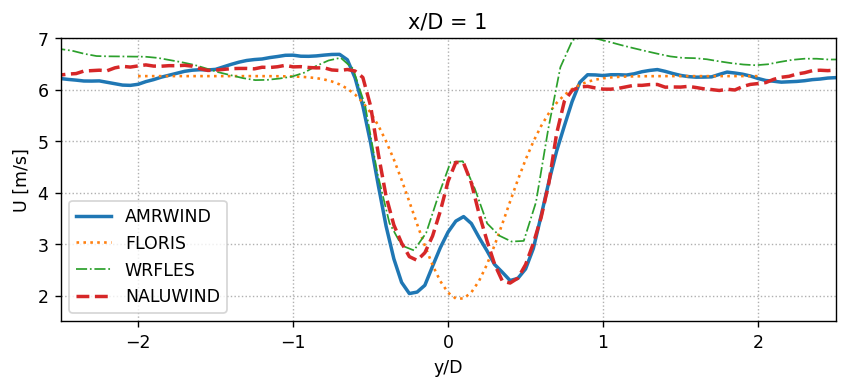

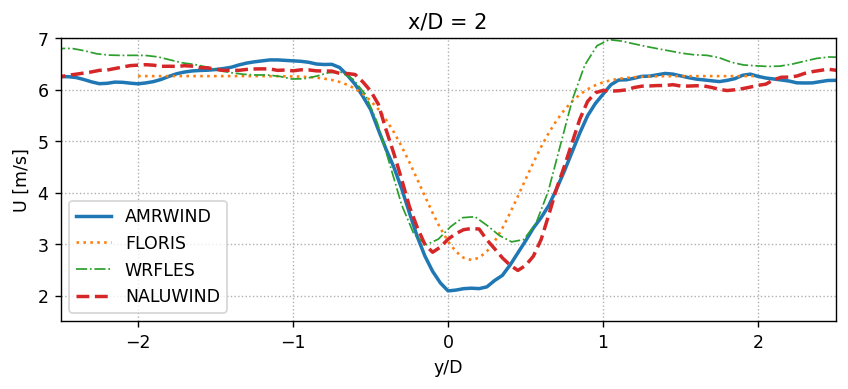

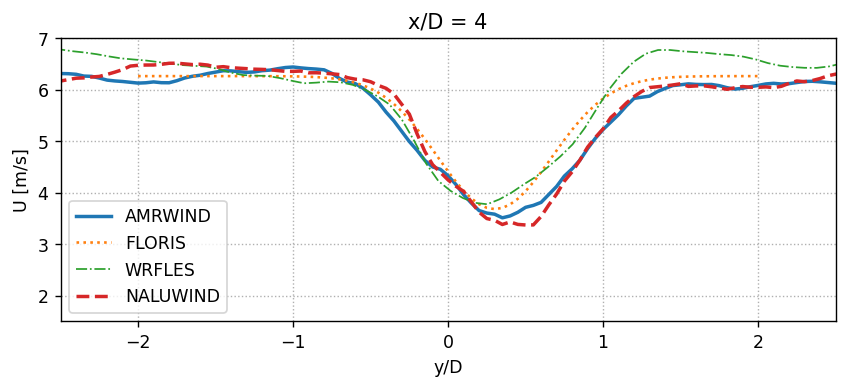

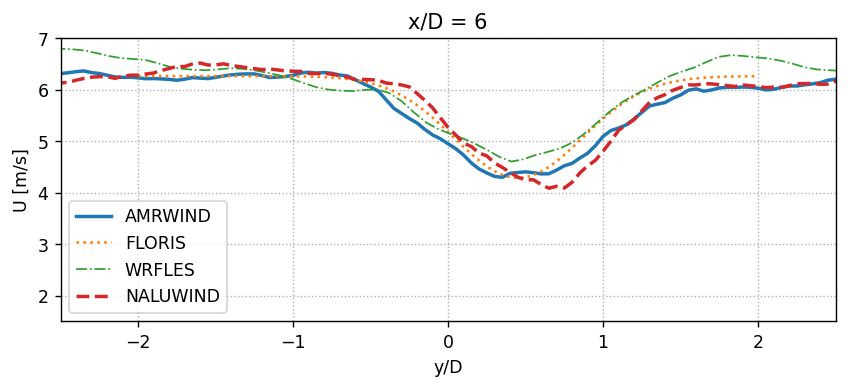

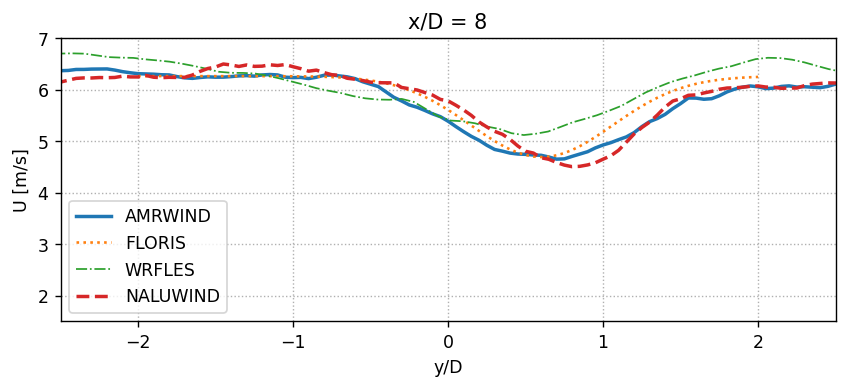

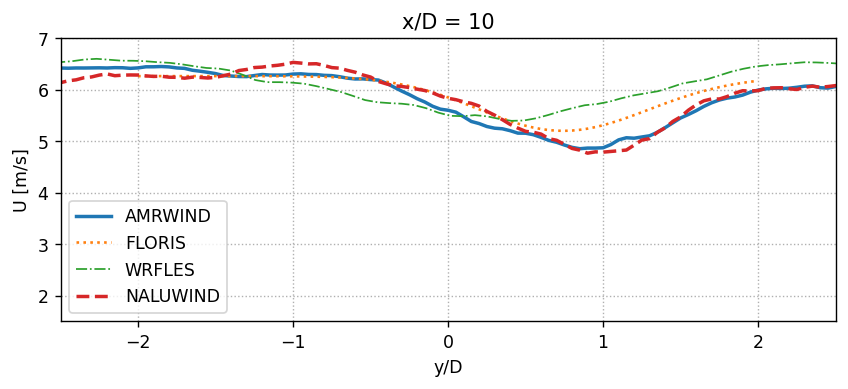

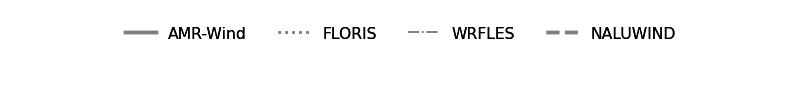

In [4]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

xtarget=[-2, 1, 2,4,6,8, 10]
for ix, xD in enumerate(xtarget):
    fig, ax = plt.subplots(1,1, figsize=(8,3), dpi=125)
    for icase, case in enumerate(cases):
        label   = case['label']
        prefix  = case['prefix']
        datadir = case['datadir']
        lstyle  = case['linestyle']
        fname   = case['fname'] #f'{prefix}_HH_VEL_PROFILE_x_{xD:06.2f}D.dat'
        dat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix, xD=xD))
        ax.plot(dat[:,0], dat[:,1],  label=prefix, **lstyle) # color=cycle[ix],
    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([1.5,7])
    ax.grid(ls=':')
    ax.set_xlabel('y/D')
    ax.set_ylabel('U [m/s]')
    ax.legend()
    ax.set_title(f'x/D = {xD}')

makelegend(cases, xtarget, fontsize=9)

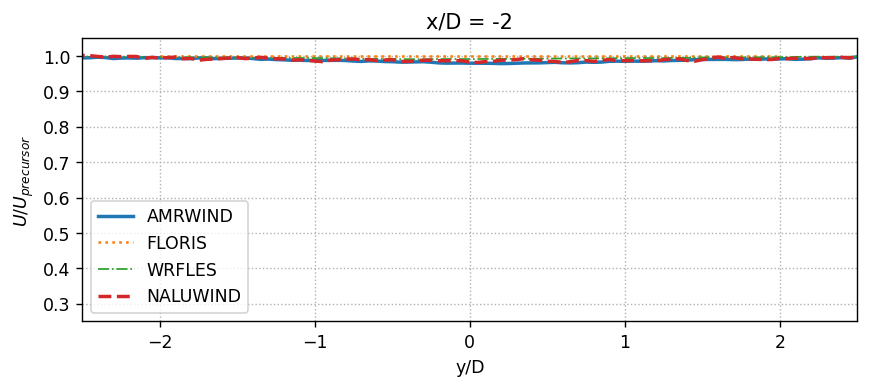

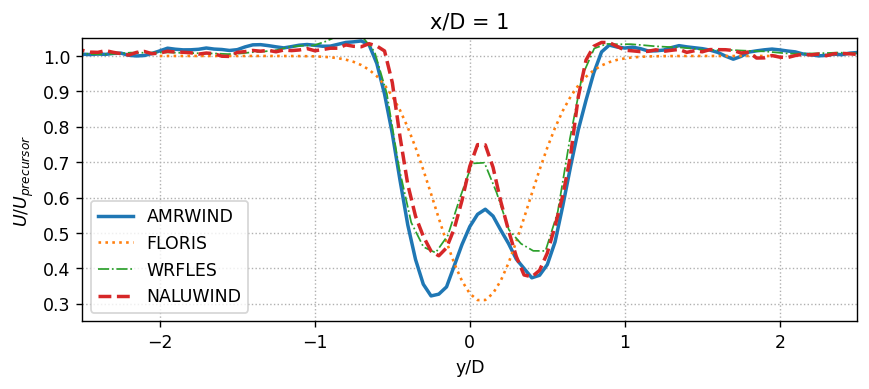

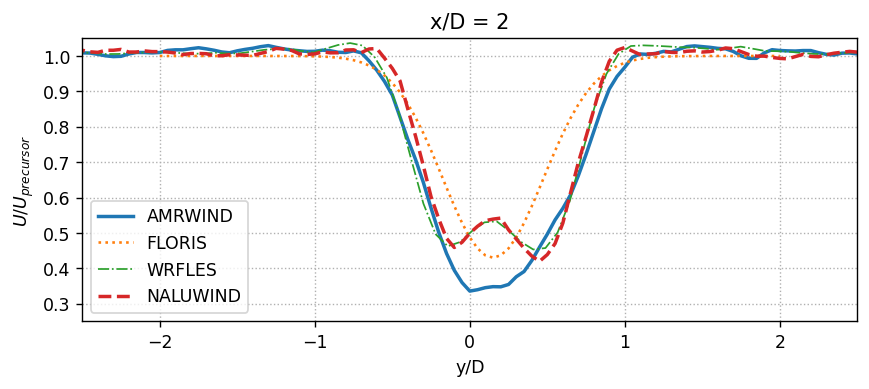

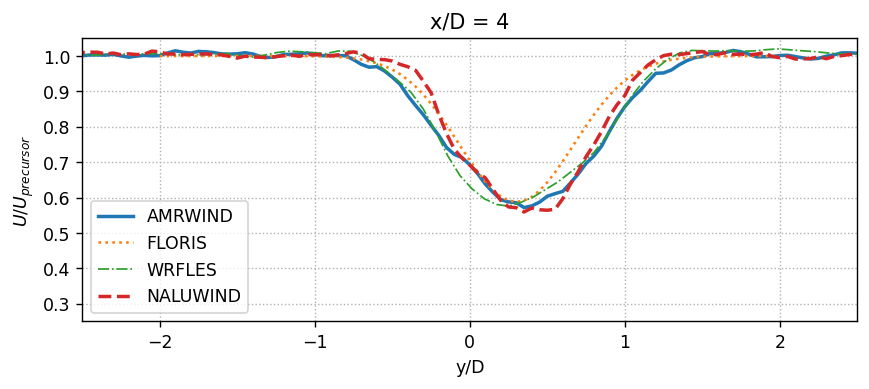

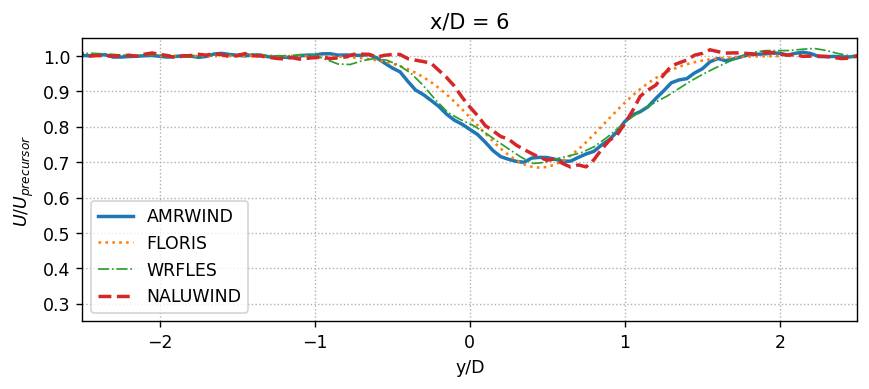

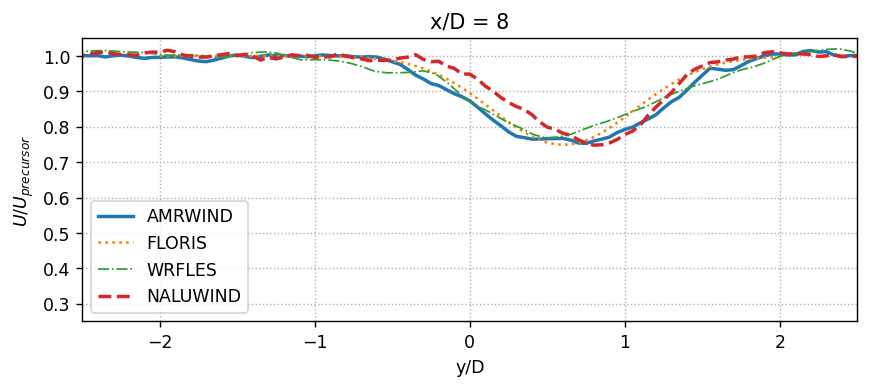

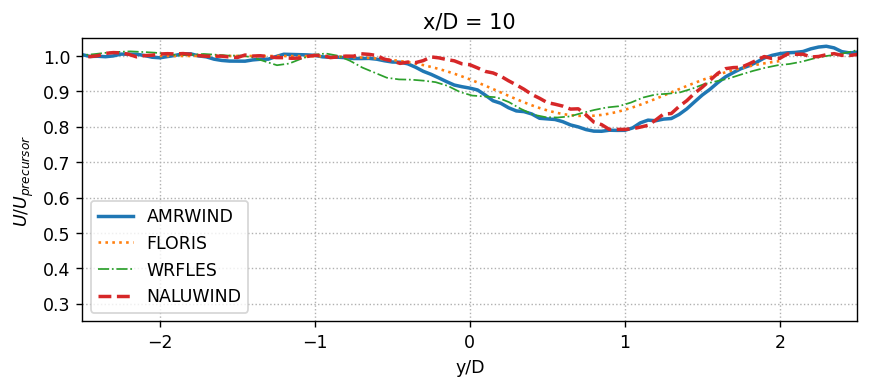

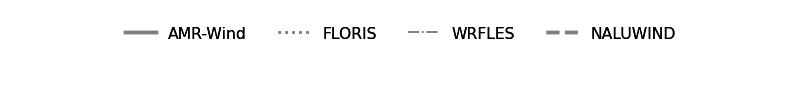

In [5]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

xtarget=[-2, 1, 2,4,6,8, 10]
for ix, xD in enumerate(xtarget):
    fig, ax = plt.subplots(1,1, figsize=(8,3), dpi=125)
    for icase, case in enumerate(cases):
        label   = case['label']
        prefix  = case['prefix']
        datadir = case['datadir']
        lstyle  = case['linestyle']
        fname   = case['fname'] #f'{prefix}_HH_VEL_PROFILE_x_{xD:06.2f}D.dat'

        turbdat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix, xD=xD))        
        if 'noturbdir' in case:
            noturbdir = case['noturbdir']
            noturbdat= np.loadtxt(noturbdir+'/'+fname.format(prefix=prefix, xD=xD))
        else:
            noturbdat= case['Uinf']*np.ones(turbdat.shape)
        
        ax.plot(turbdat[:,0], turbdat[:,1]/noturbdat[:,1],  label=prefix, **lstyle) # color=cycle[ix],
    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([0.25,1.05])
    ax.grid(ls=':')
    ax.set_xlabel('y/D')
    ax.set_ylabel('$U/U_{precursor}$')
    ax.legend()
    ax.set_title(f'x/D = {xD}')

makelegend(cases, xtarget, fontsize=9)